# Week1

# Exercise question 5 and 6 for Dataset 1(Data1.csv)
## Questions

 Explore two different datasets provided in the shared folders with the following steps:
 
a. Import the required libraries.

b. Load the dataset.

c. Examine data information.

d. Identify and analyze null values using df. isnull().

e. Conduct statistical analysis. (count, mean, SD, min, max, Quartile)

f. Generate boxplots for each column to detect outliers.

g. Determine quartiles and remove outliers.

h. Calculate correlations and visualize them with a heatmap.

i. Normalize the various features of the given datasets. (MinMaxScaler)

j. Arrange correlation values for each attribute in ascending order.

### a. Import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### b. Load the dataset.

In [2]:
df=pd.read_csv("Data1.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### c. Examine data information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### d. Identify and analyze null values using df. isnull().

In [6]:
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null values

### e. Conduct statistical analysis. (count, mean, SD, min, max, Quartile)

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### f. Generate boxplots for each column to detect outliers.

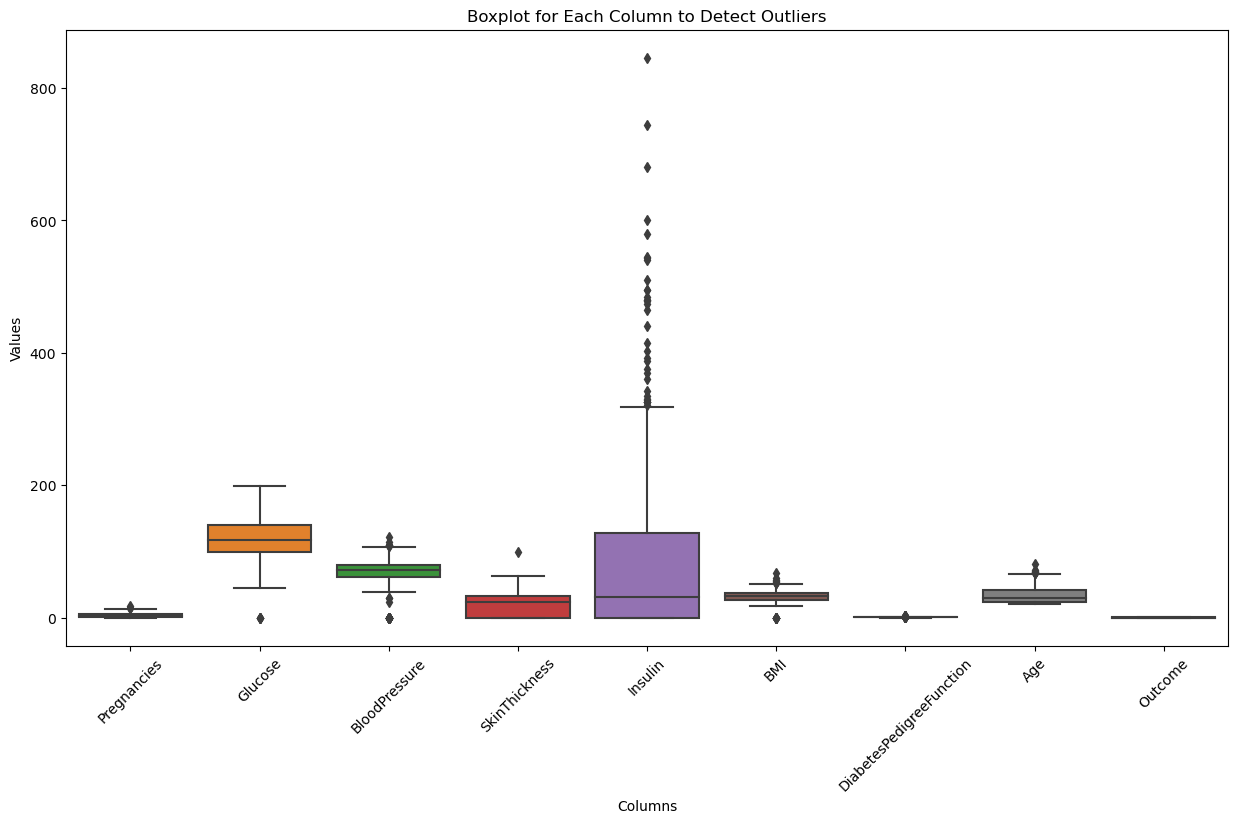

In [9]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45) 
plt.title('Boxplot for Each Column to Detect Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

### g. Determine quartiles and remove outliers.

In [10]:
import pandas as pd

def replace_outliers_with_median(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        col_median = df[col].median()
        df[col] = df[col].where((df[col] >= lower_limit) & (df[col] <= upper_limit), col_median)
    
    return df
df = replace_outliers_with_median(df)


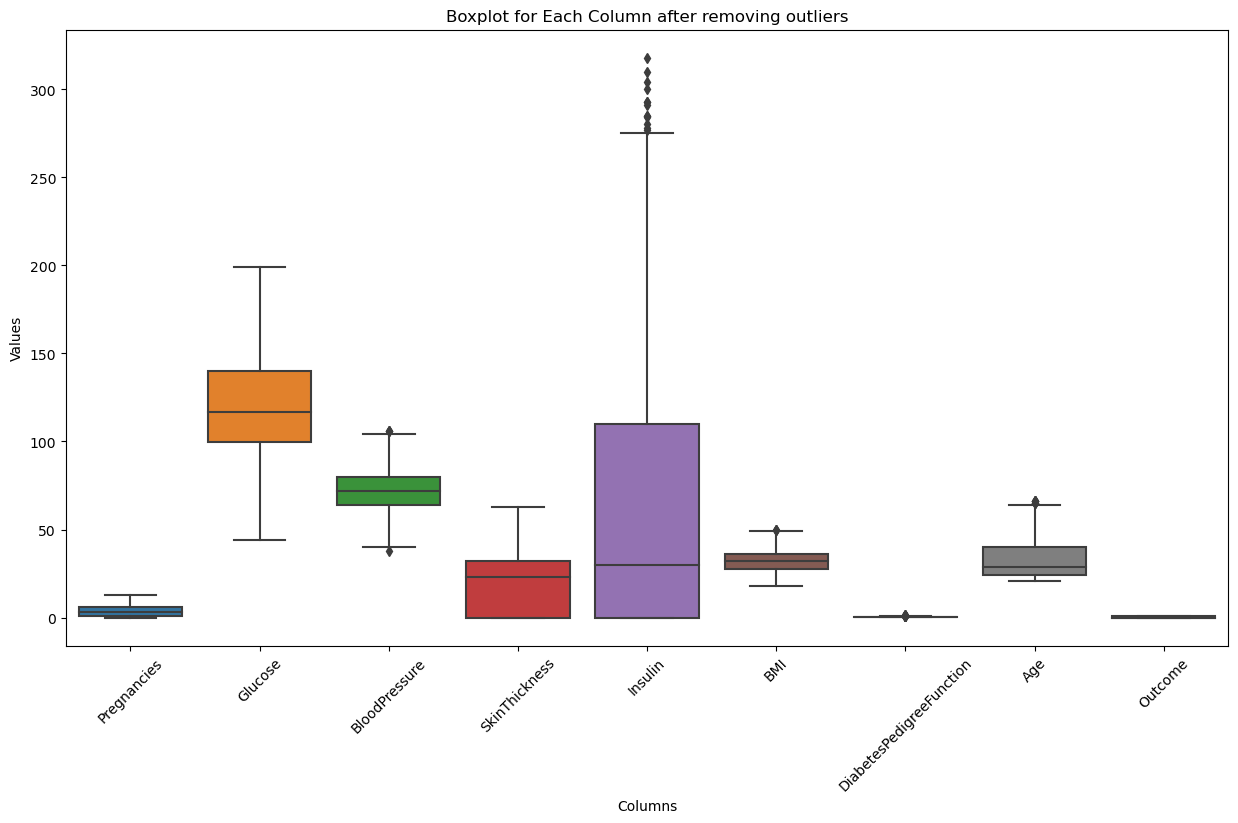

In [11]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45) 
plt.title('Boxplot for Each Column after removing outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

### h. Calculate correlations and visualize them with a heatmap.

<Axes: >

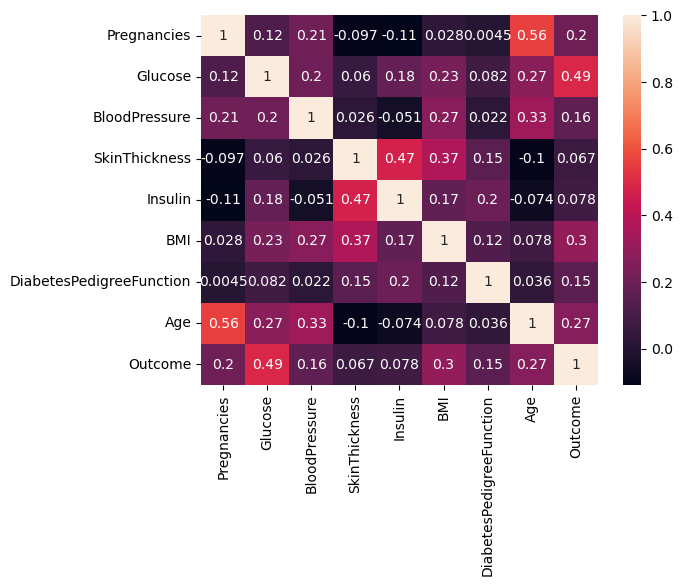

In [12]:
corr=df.corr()
sns.heatmap(corr,annot=True)

### i. Normalize the various features of the given datasets. (MinMaxScaler)

In [13]:
def minmaxscaler(df):
    for col in df.columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df
df=minmaxscaler(df)
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.461538  0.670968       0.500000       0.555556  0.000000  0.484277   
1     0.076923  0.264516       0.411765       0.460317  0.000000  0.264151   
2     0.615385  0.896774       0.382353       0.000000  0.000000  0.160377   
3     0.076923  0.290323       0.411765       0.365079  0.295597  0.311321   
4     0.000000  0.600000       0.029412       0.555556  0.528302  0.783019   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.493261  0.644444      1.0  
1                  0.245283  0.222222      0.0  
2                  0.533693  0.244444      1.0  
3                  0.079964  0.000000      0.0  
4                  0.264600  0.266667      1.0

### j. Arrange correlation values for each attribute in ascending order.

<Axes: >

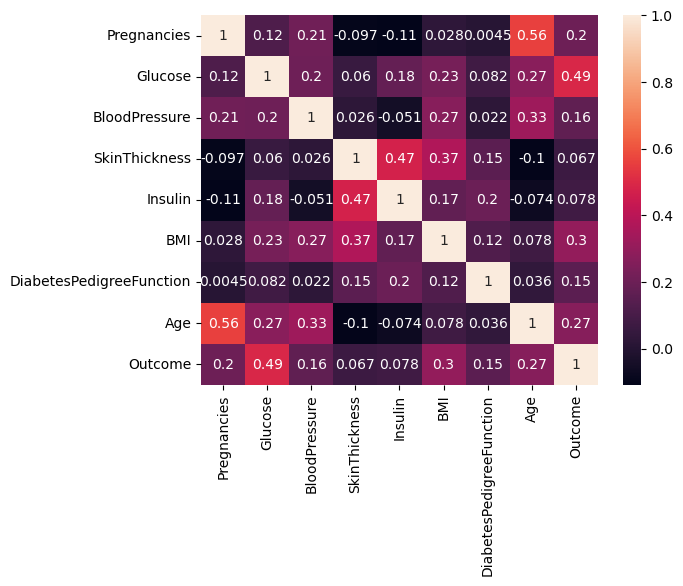

In [14]:
corr_matrix = df.corr()#after normalization
sns.heatmap(corr_matrix, annot=True)

In [15]:
def arrange_corr_values(df):
    for column in df.columns:
        print("for column->",column)
        print(corr_matrix[column].sort_values(ascending=True))

In [16]:
arrange_corr_values(df)

for column-> Pregnancies
Insulin                    -0.108474
SkinThickness              -0.096720
DiabetesPedigreeFunction    0.004519
BMI                         0.028339
Glucose                     0.117692
Outcome                     0.202492
BloodPressure               0.208953
Age                         0.560768
Pregnancies                 1.000000
Name: Pregnancies, dtype: float64
for column-> Glucose
SkinThickness               0.060034
DiabetesPedigreeFunction    0.081613
Pregnancies                 0.117692
Insulin                     0.179566
BloodPressure               0.204539
BMI                         0.228245
Age                         0.274264
Outcome                     0.492782
Glucose                     1.000000
Name: Glucose, dtype: float64
for column-> BloodPressure
Insulin                    -0.050956
DiabetesPedigreeFunction    0.022495
SkinThickness               0.025645
Outcome                     0.164874
Glucose                     0.204539
Pregnancies 

# Exercise question 6
## Questions
Conduct a visual exploration of the given dataset by employing four distinct Python
plotting libraries: Matplotlib, Seaborn, Bokeh, and Plotly. Perform the following 
visualizations:

a. Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 
and (2) col3, col4 (3) col5, col6.

b. Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

c. Bar charts representing columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

d. Histograms to depict the dataset's distribution

## Using Matplotlib library

### a. Scatter plots with coloured points and adjustable sizes using columns (1) col1, col2 and (2) col3, col4 (3) col5, col6.

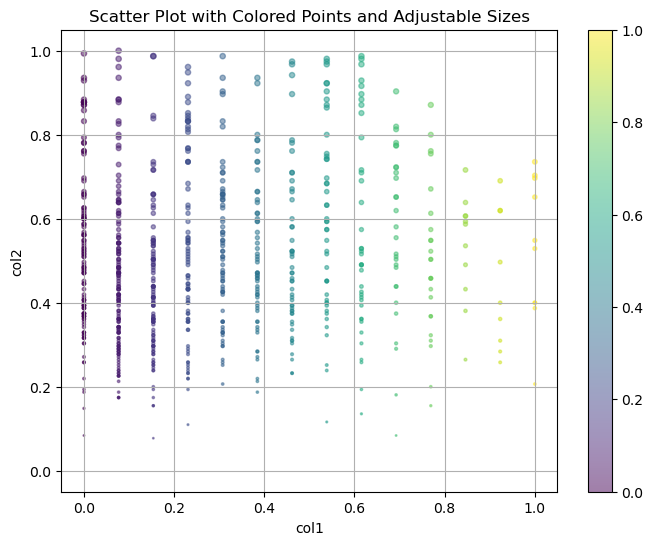

In [17]:
col1 = df['Pregnancies']
col2 = df['Glucose']


plt.figure(figsize=(8, 6))
plt.scatter(col1, col2, c=col1, s=col2*15, alpha=0.5, cmap='viridis')


plt.colorbar()  
plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

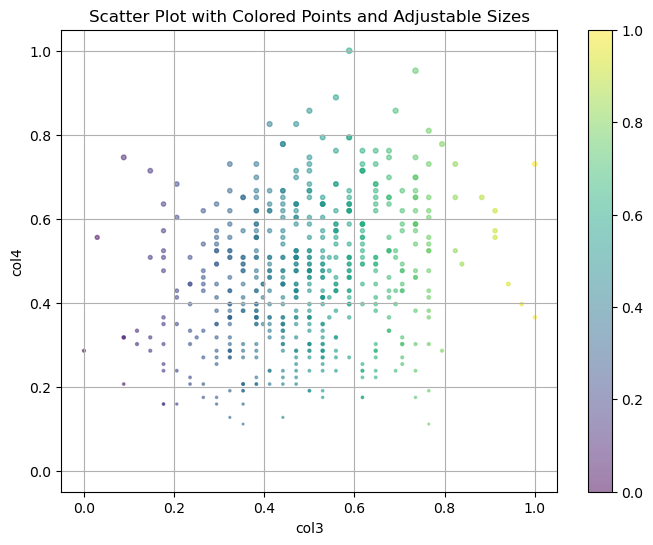

In [18]:
col3 = df['BloodPressure']
col4 = df['SkinThickness']


plt.figure(figsize=(8, 6))
plt.scatter(col3, col4, c=col3, s=col4*15, alpha=0.5, cmap='viridis')


plt.colorbar()  
plt.xlabel('col3')
plt.ylabel('col4')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

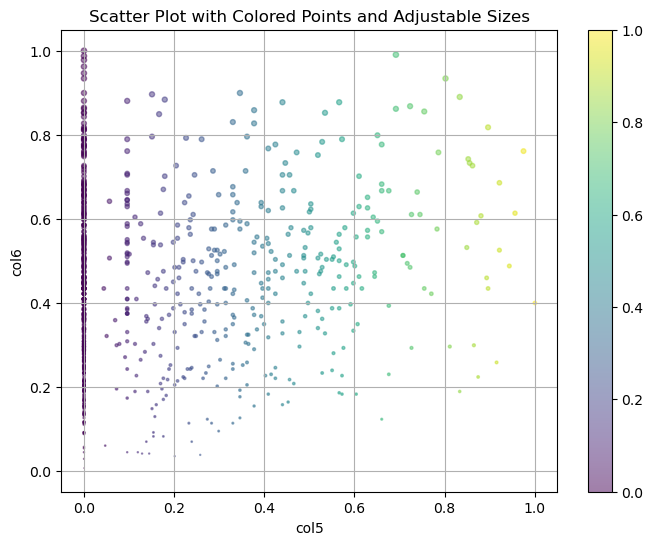

In [19]:
col5 = df['Insulin']
col6 = df['BMI']


plt.figure(figsize=(8, 6))
plt.scatter(col5, col6, c=col5, s=col6*15, alpha=0.5, cmap='viridis')


plt.colorbar()  
plt.xlabel('col5')
plt.ylabel('col6')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

### b. Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

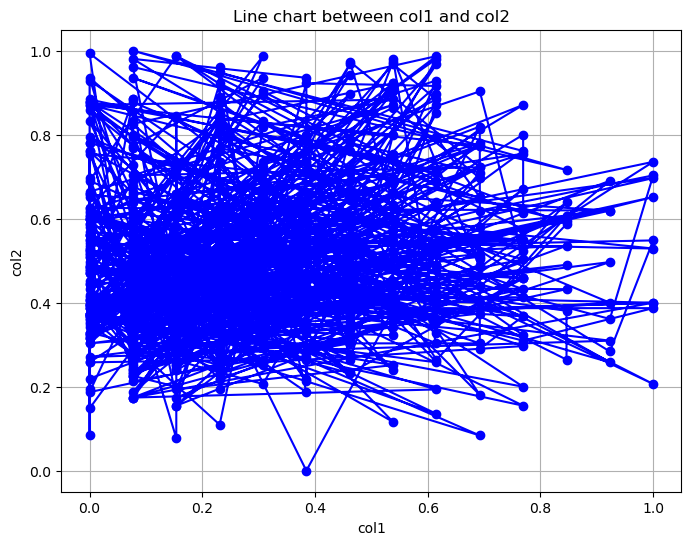

In [20]:
plt.figure(figsize=(8, 6))

# Line chart for col1 and col2
plt.plot(df['Pregnancies'], df['Glucose'], marker='o', linestyle='-', color='b')
plt.title('Line chart between col1 and col2')
plt.xlabel('col1')
plt.ylabel('col2')
plt.grid(True)
plt.show()

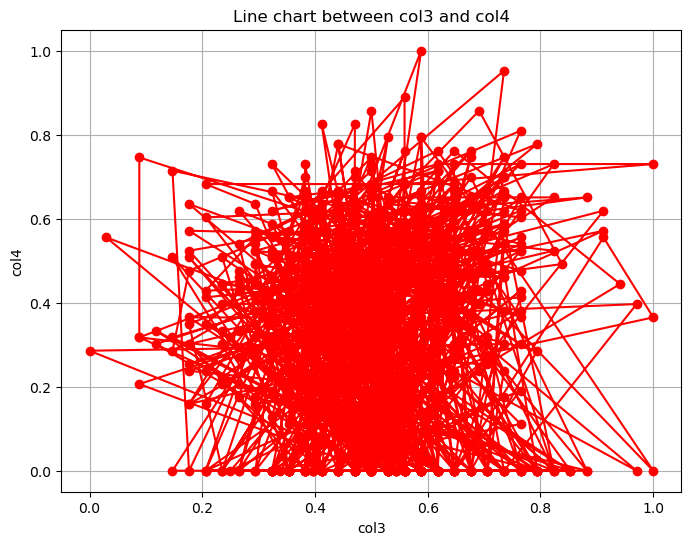

In [21]:
plt.figure(figsize=(8, 6))

# Line chart for col3 and col4
plt.plot(df['BloodPressure'], df['SkinThickness'], marker='o', linestyle='-', color='r')
plt.title('Line chart between col3 and col4')
plt.xlabel('col3')
plt.ylabel('col4')
plt.grid(True)
plt.show()

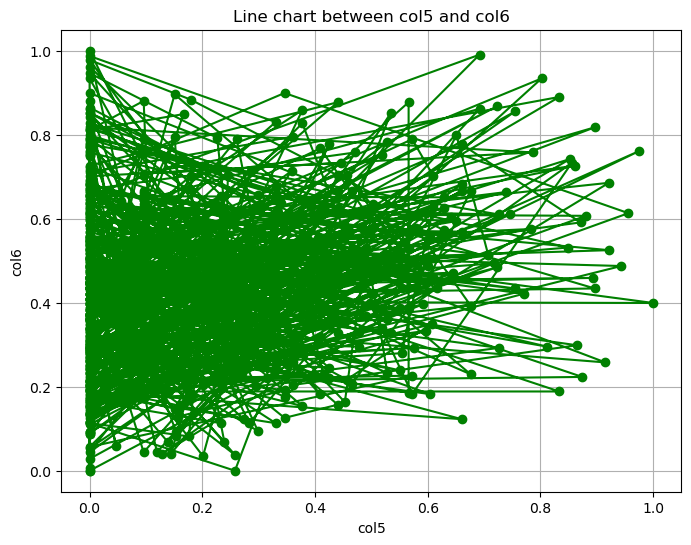

In [22]:
plt.figure(figsize=(8, 6))

# Line chart for col5 and col6
plt.plot(df['Insulin'], df['BMI'], marker='o', linestyle='-', color='g')
plt.title('Line chart between col5 and col6')
plt.xlabel('col5')
plt.ylabel('col6')
plt.grid(True)
plt.show()

### c. Bar charts representing columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [23]:
df1=pd.read_csv("Data1.csv")
df1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

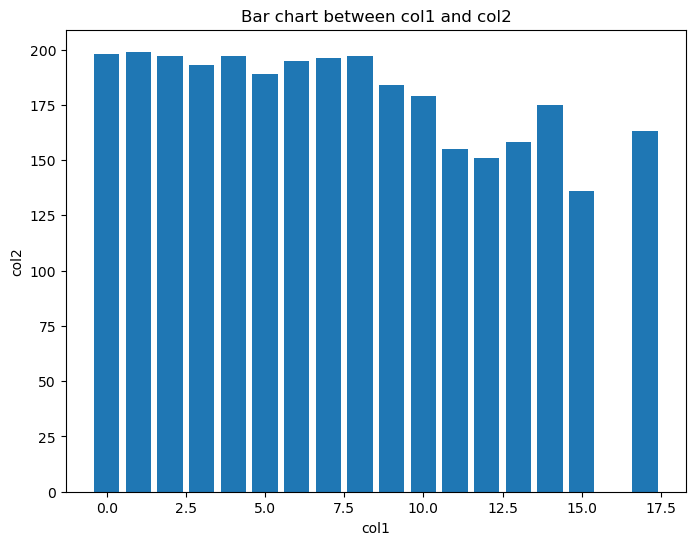

In [24]:
plt.figure(figsize=(8, 6))
plt.bar(x=df1['Pregnancies'], height=df1['Glucose'])
plt.title('Bar chart between col1 and col2')
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()


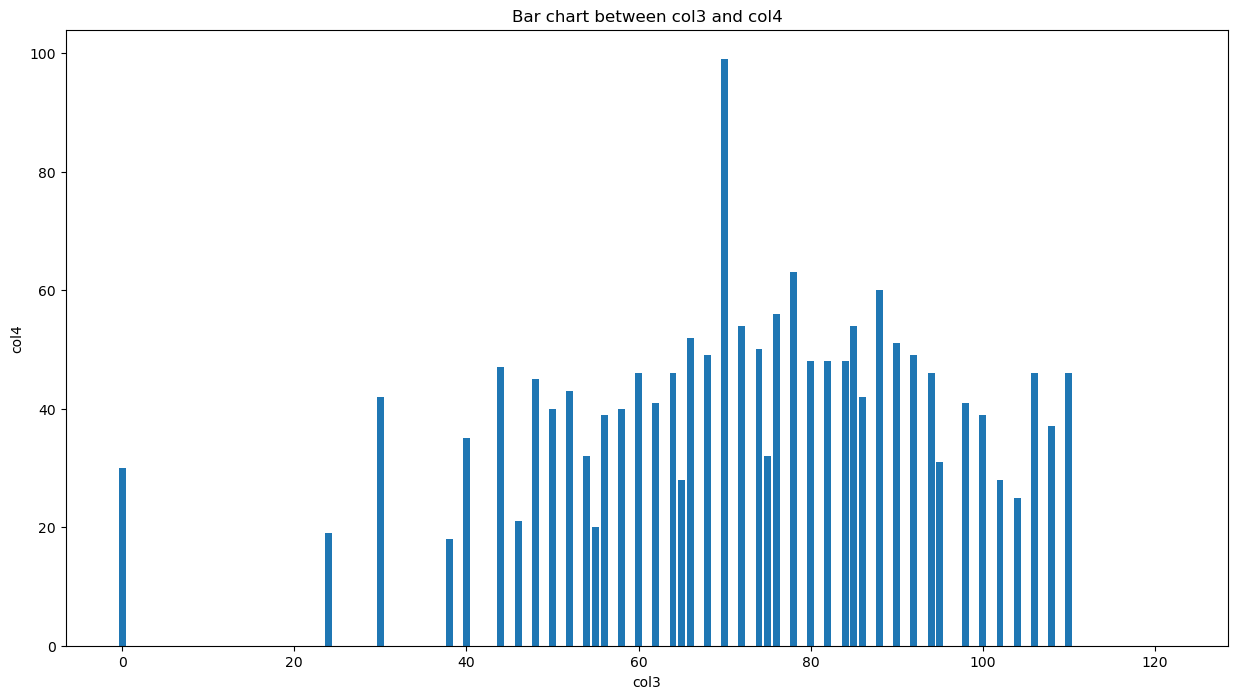

In [25]:
plt.figure(figsize=(15,8))
plt.bar(x=df1['BloodPressure'], height=df1['SkinThickness'])
plt.title('Bar chart between col3 and col4')
plt.xlabel('col3')
plt.ylabel('col4')
plt.show()

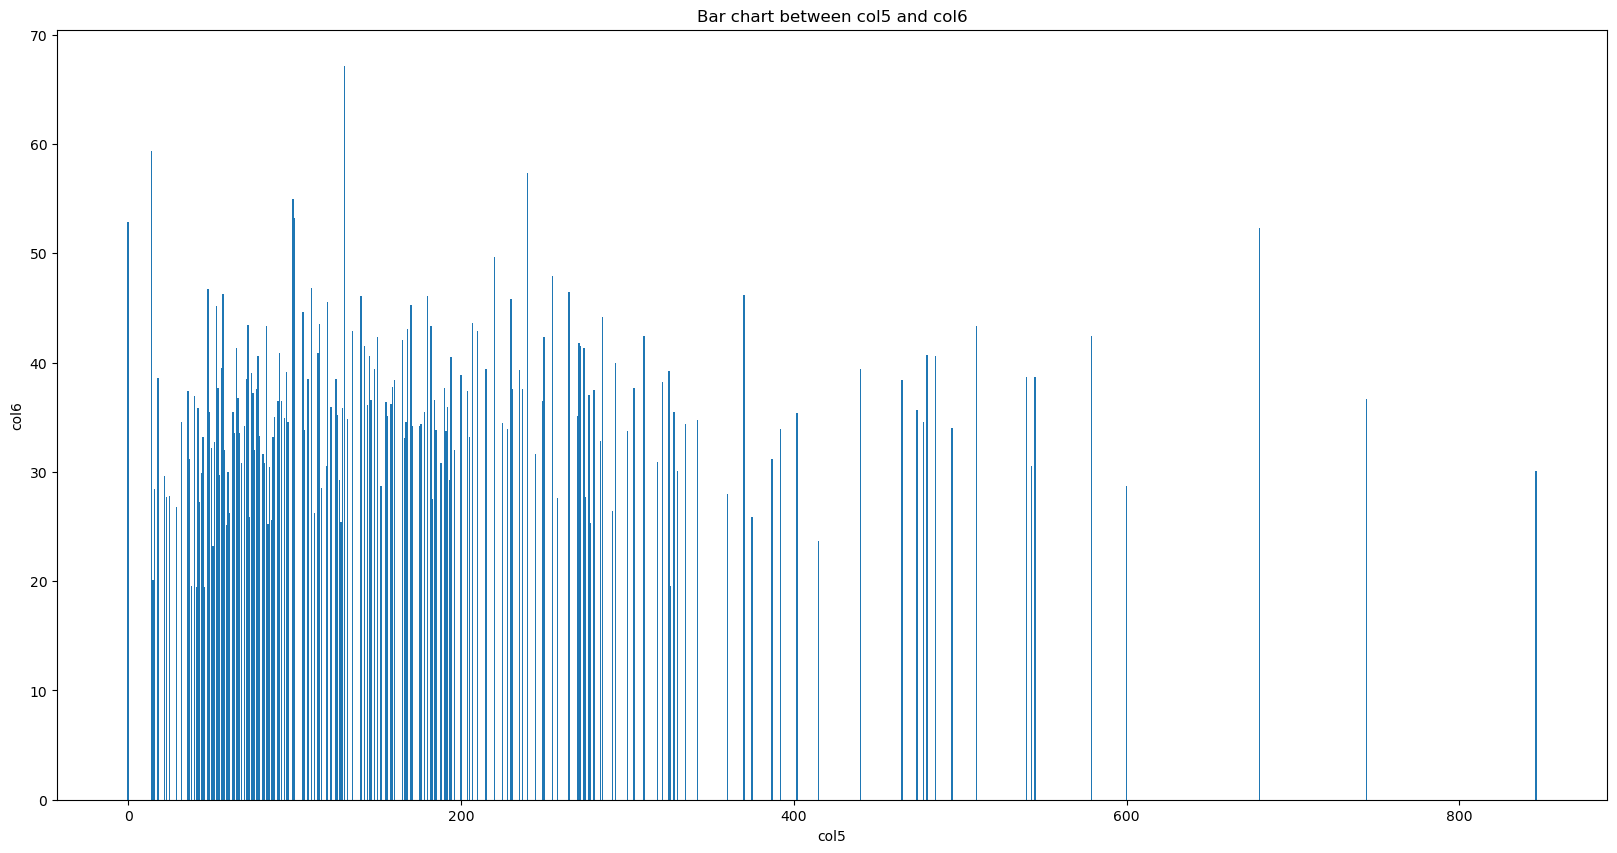

In [26]:
plt.figure(figsize=(20,10))
plt.bar(x=df1['Insulin'], height=df1['BMI'])
plt.title('Bar chart between col5 and col6')
plt.xlabel('col5')
plt.ylabel('col6')
plt.show()

### d. Histograms to depict the dataset's distribution

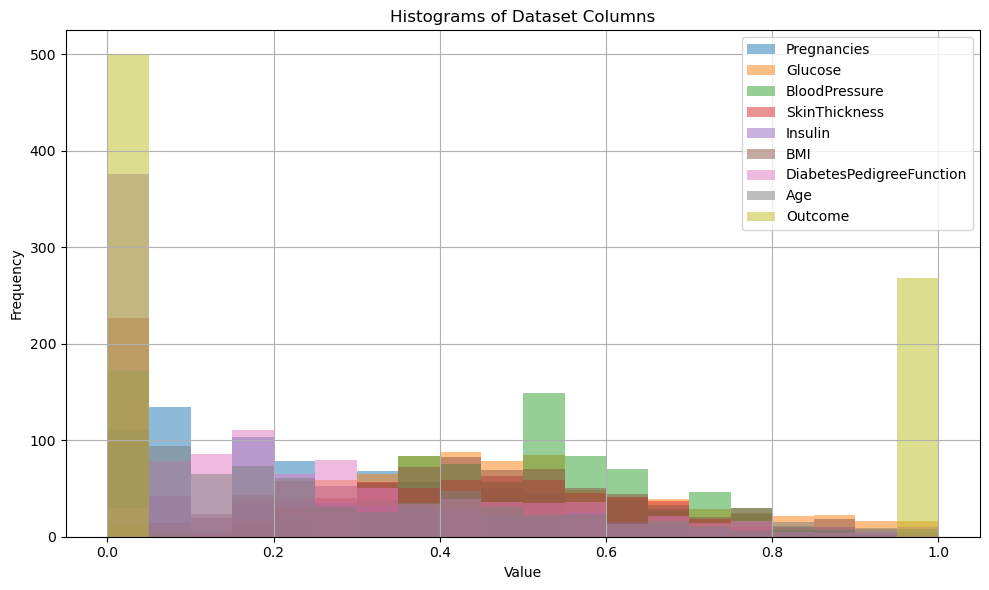

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

num_bins = 20  

for col in df.columns:
    plt.hist(df[col], bins=num_bins, alpha=0.5, label=col)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Dataset Columns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


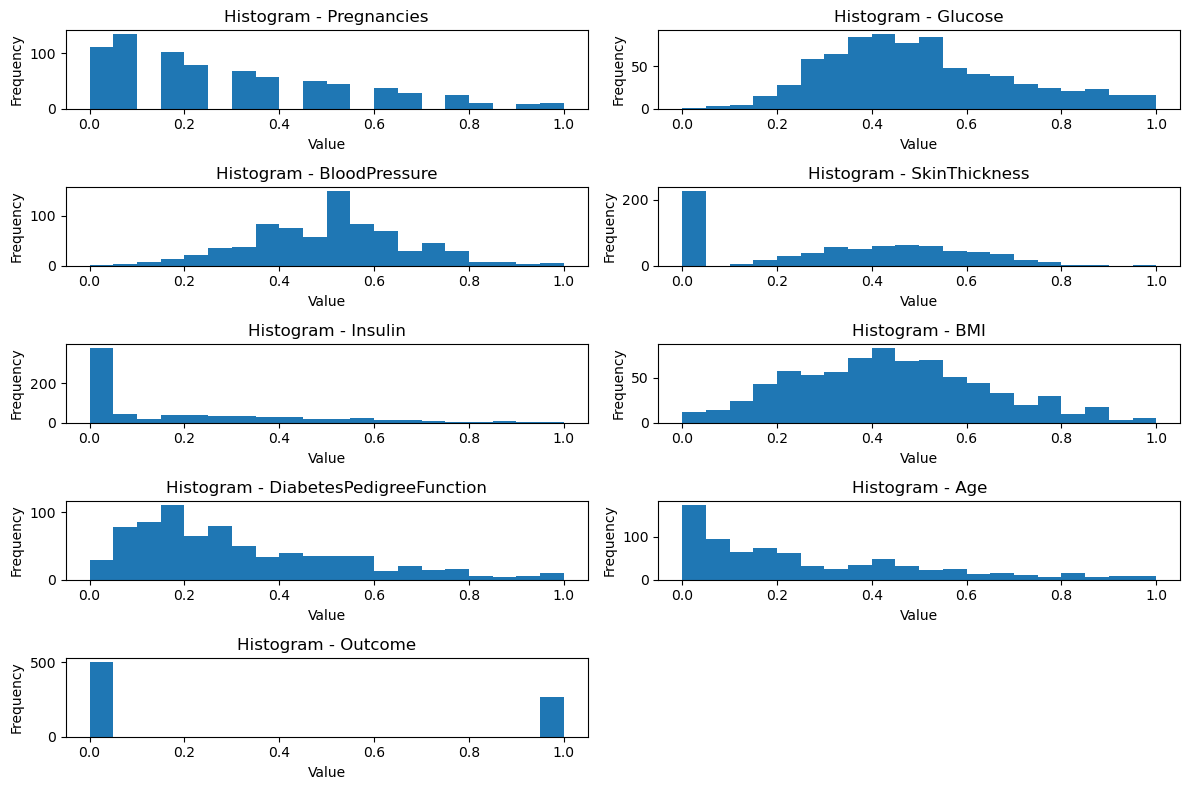

In [28]:
import matplotlib.pyplot as plt

num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  

plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 2, i)
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram - {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Using Seaborn library

### a. Scatter plots for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

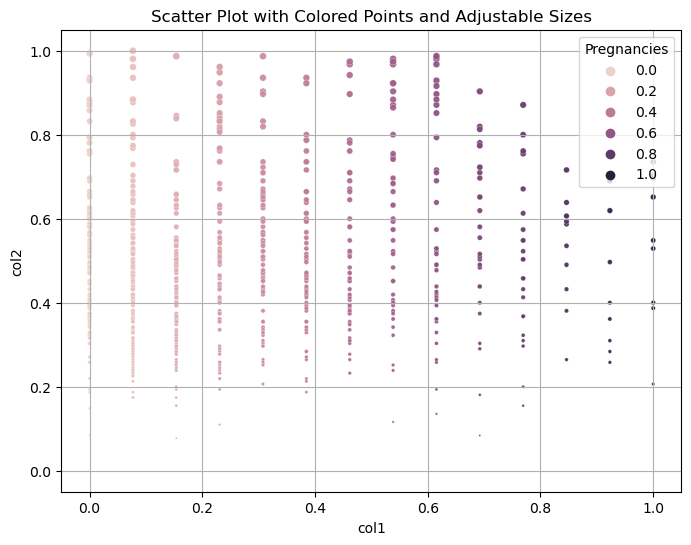

In [32]:
col1 = df['Pregnancies']
col2 = df['Glucose']


plt.figure(figsize=(8, 6))
sns.scatterplot(x=col1, y=col2, hue=col1, s=col2*25, alpha=0.95)

plt.xlabel('col1')
plt.ylabel('col2')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

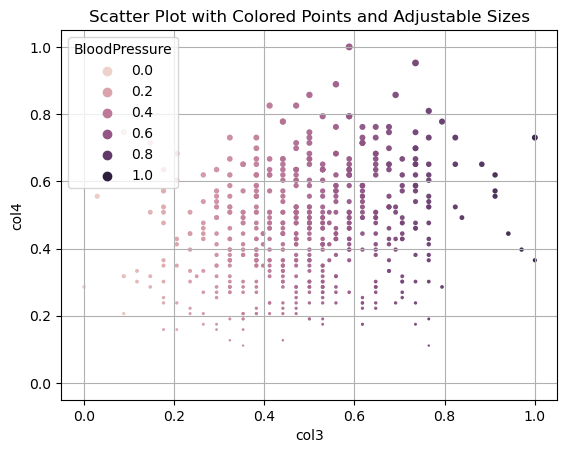

In [33]:
col3 = df['BloodPressure']
col4 = df['SkinThickness']
sns.scatterplot(x=col3, y=col4, hue=col3, s=col4*25, alpha=0.95)
plt.xlabel('col3')
plt.ylabel('col4')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

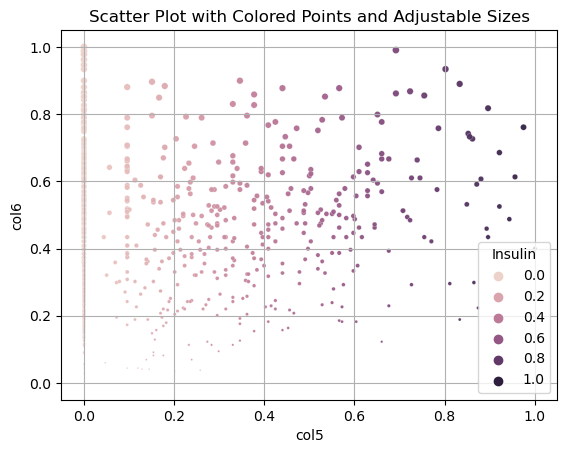

In [34]:
col5 = df['Insulin']
col6 = df['BMI']
sns.scatterplot(x=col5, y=col6, hue=col5, s=col6*25, alpha=0.95)
plt.xlabel('col5')
plt.ylabel('col6')
plt.title('Scatter Plot with Colored Points and Adjustable Sizes')
plt.grid(True)
plt.show()

### b. Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

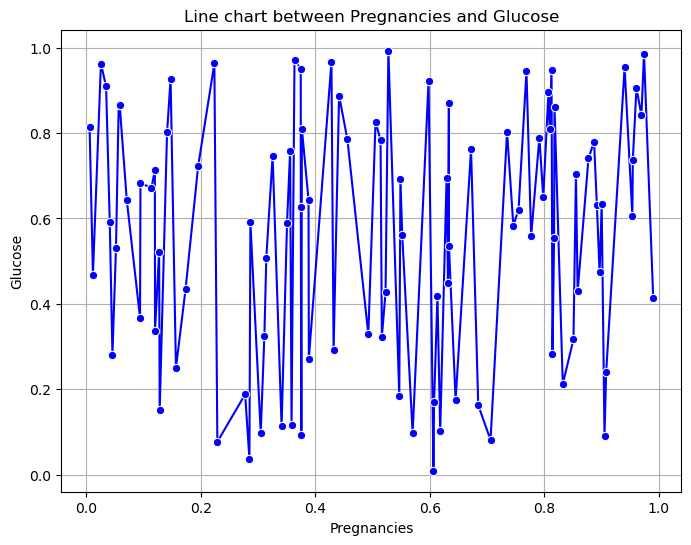

In [62]:
plt.figure(figsize=(8, 6))


sns.lineplot(x=df['Pregnancies'], y=df['Glucose'], marker='o', linestyle='-', color='b')
plt.title('Line chart between Pregnancies and Glucose')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.grid(True)
plt.show()

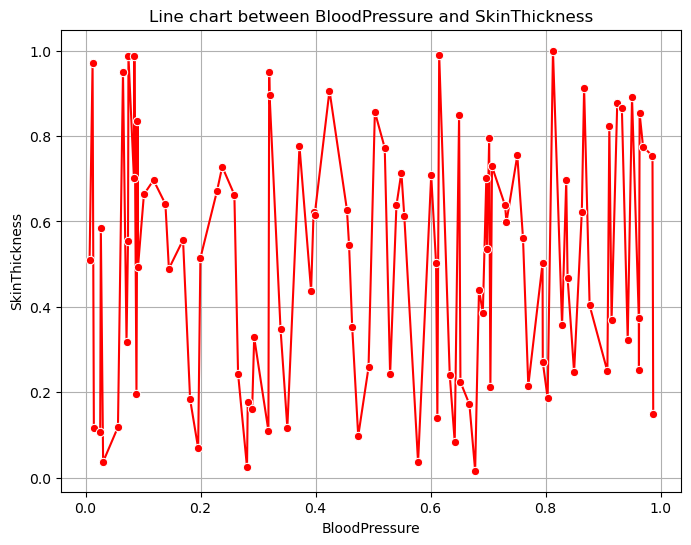

In [63]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['BloodPressure'], y=df['SkinThickness'], marker='o', linestyle='-', color='r')
plt.title('Line chart between BloodPressure and SkinThickness')
plt.xlabel('BloodPressure')
plt.ylabel('SkinThickness')
plt.grid(True)
plt.show()

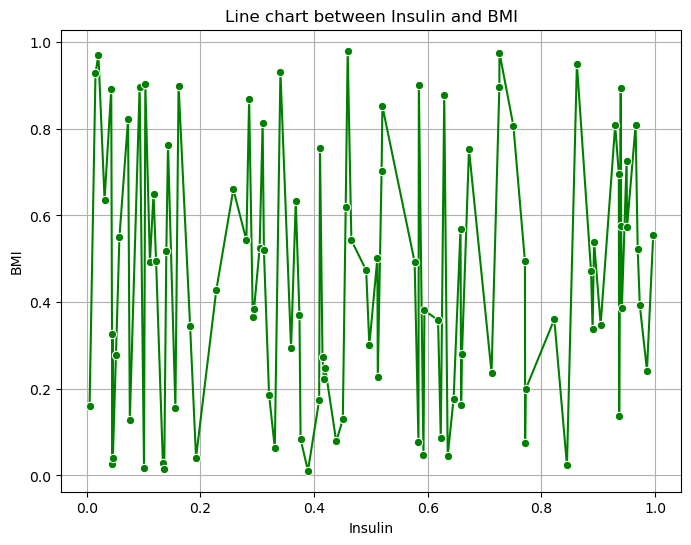

In [64]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Insulin'], y=df['BMI'], marker='o', linestyle='-', color='g')
plt.title('Line chart between Insulin and BMI')
plt.xlabel('Insulin')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


### c. Bar charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

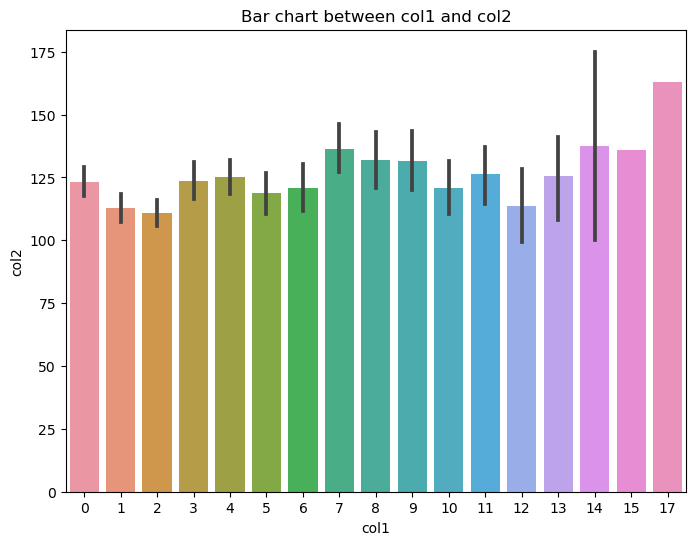

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df1['Pregnancies'], y=df1['Glucose'])
plt.title('Bar chart between col1 and col2')
plt.xlabel('col1')
plt.ylabel('col2')
plt.show()


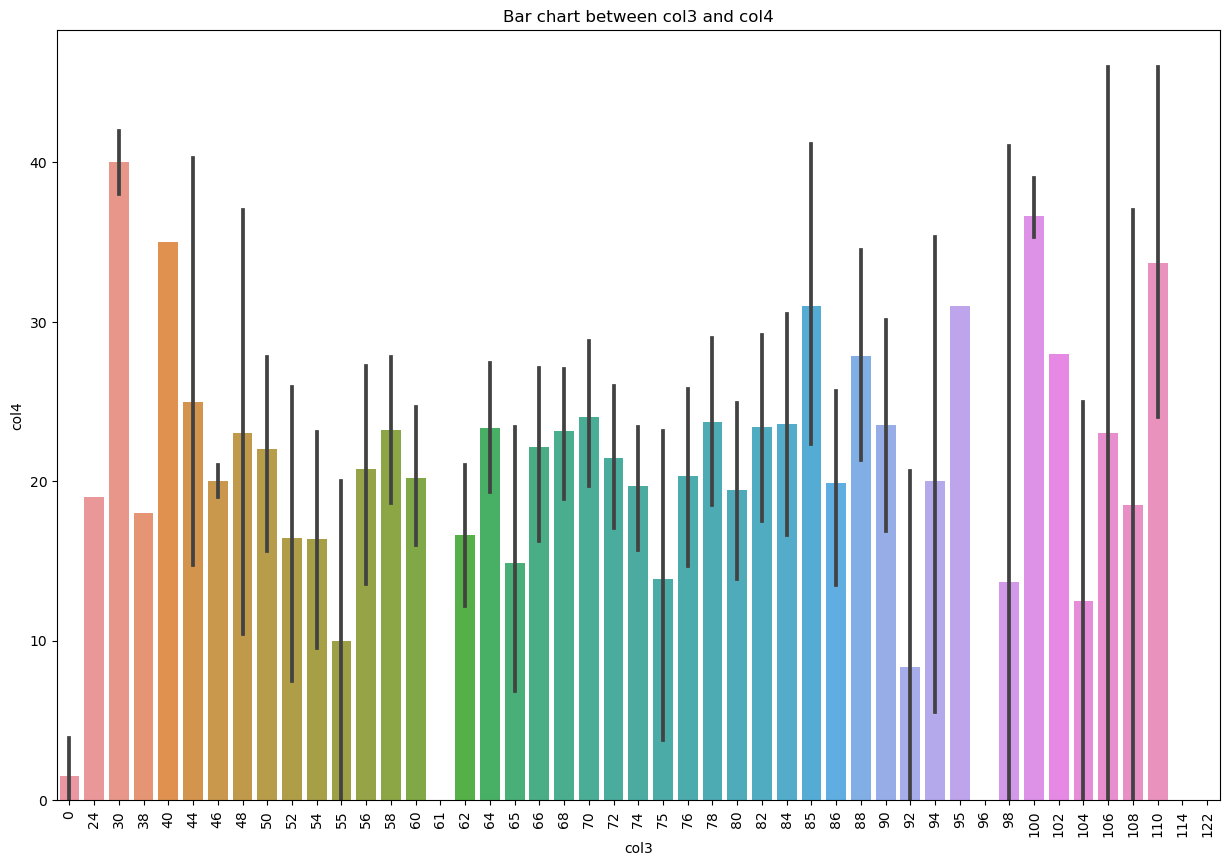

In [42]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df1['BloodPressure'], y=df1['SkinThickness'])
plt.title('Bar chart between col3 and col4')
plt.xticks(rotation=90)
plt.xlabel('col3')
plt.ylabel('col4')
plt.show()


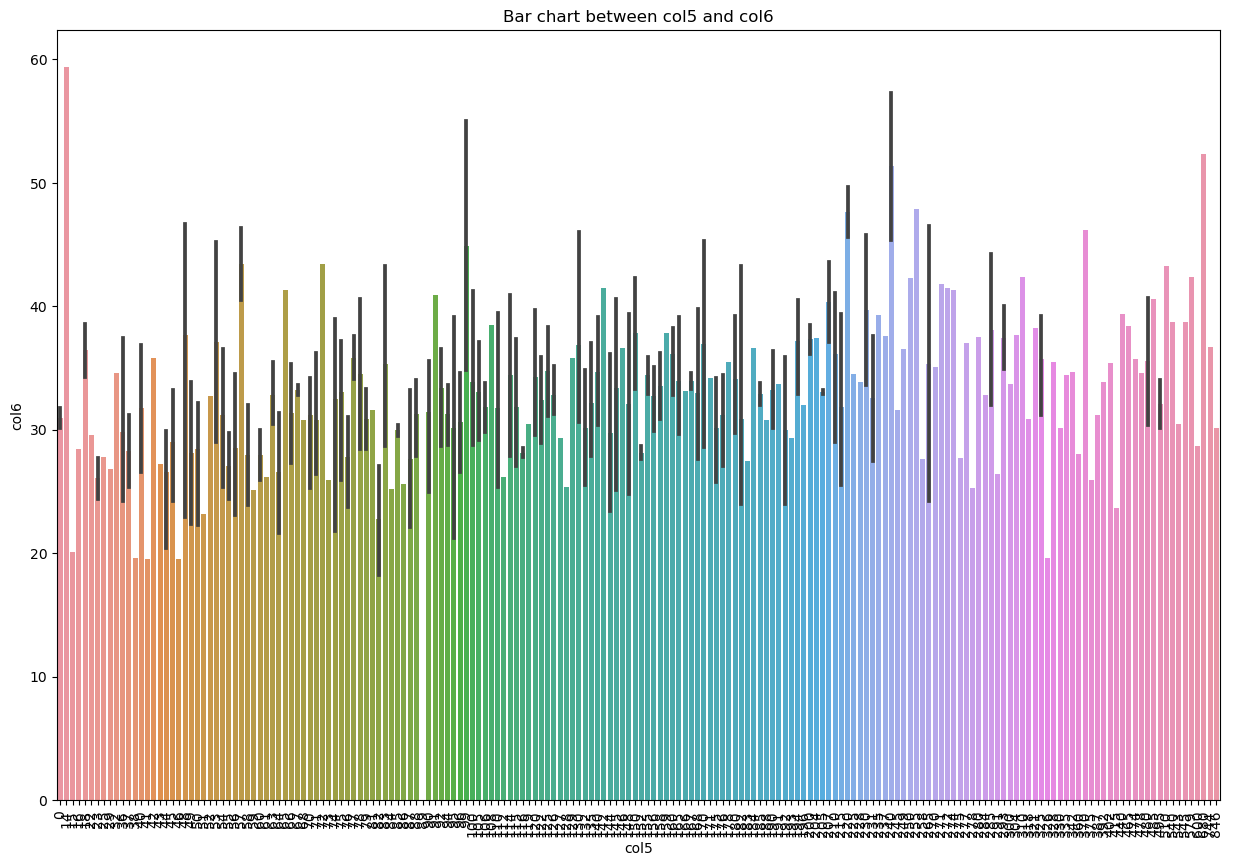

In [43]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df1['Insulin'], y=df1['BMI'])
plt.title('Bar chart between col5 and col6')
plt.xticks(rotation=90)
plt.xlabel('col5')
plt.ylabel('col6')
plt.show()


### d. Histograms to depict the dataset's distribution.

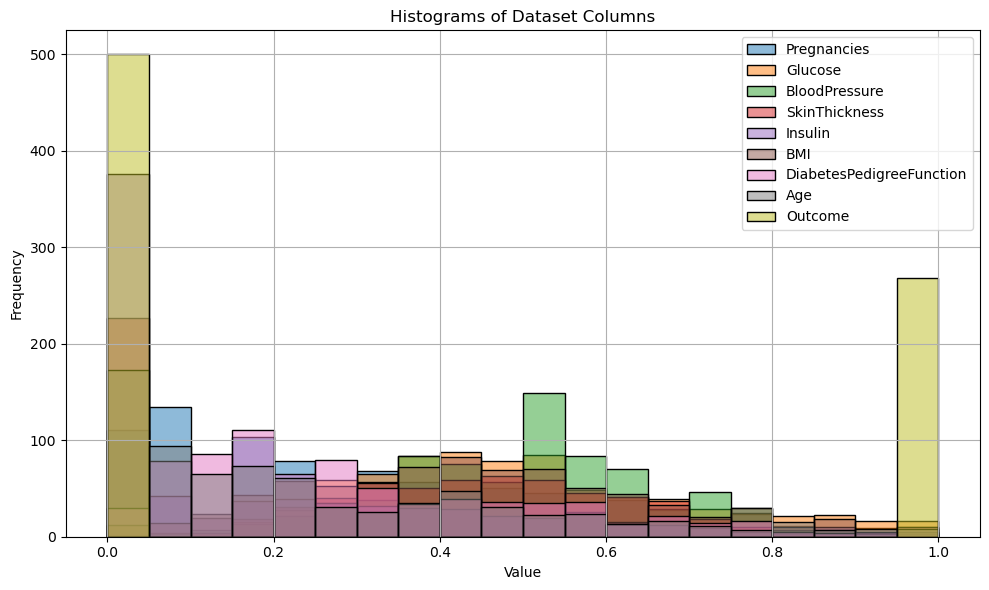

In [44]:
plt.figure(figsize=(10, 6))

num_bins = 20  

for col in df.columns:
    sns.histplot(df[col], bins=num_bins, alpha=0.5, label=col)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Dataset Columns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

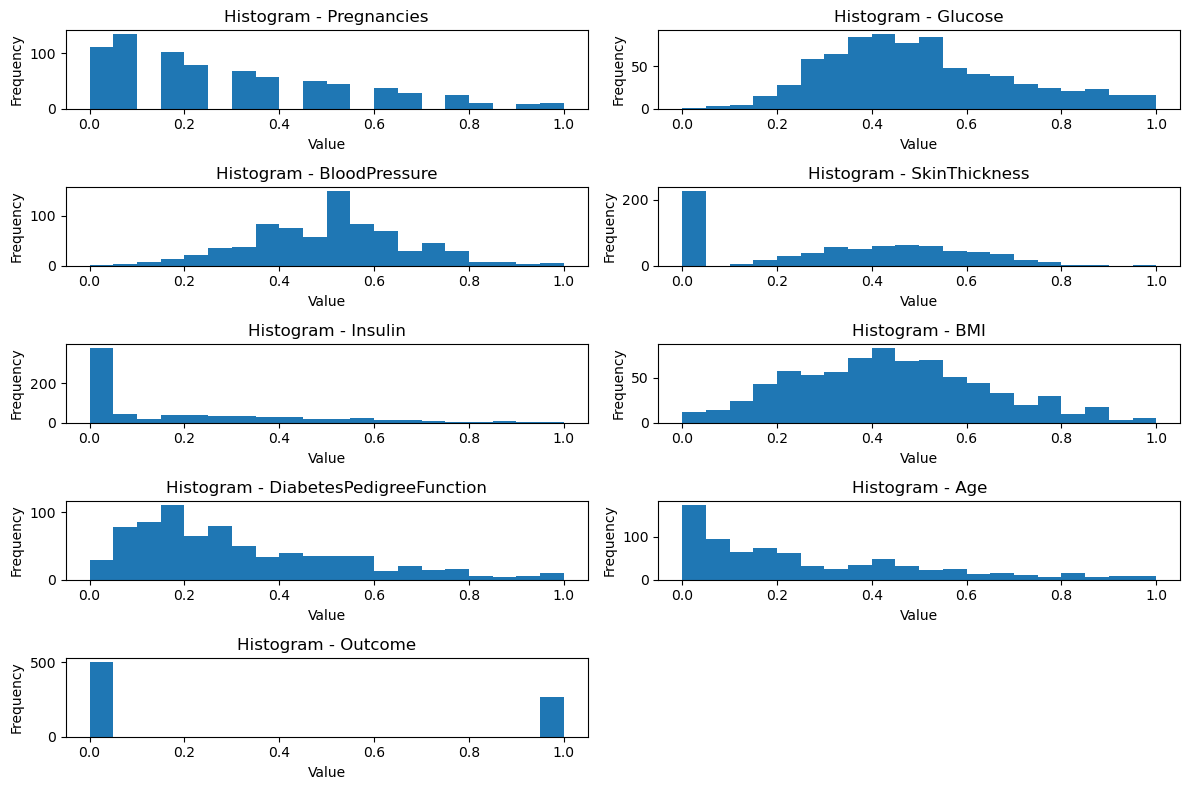

In [45]:
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  

plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 2, i)
    plt.hist(df[col], bins=20)
    plt.title(f'Histogram - {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Using bokeh library

### a. Scatter plots for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [51]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, Select, CustomJS
from bokeh.layouts import column
import pandas as pd
import numpy as np


# Enable Bokeh to display in the notebook
output_notebook()

# Create ColumnDataSources for each set of data
source1 = ColumnDataSource(data=dict(x=df['Pregnancies'], y=df['Glucose']))
source2 = ColumnDataSource(data=dict(x=df['BloodPressure'], y=df['SkinThickness']))
source3 = ColumnDataSource(data=dict(x=df['Insulin'], y=df['BMI']))

# Create a figure
p = figure(title="Scatter Plot with Dropdown", x_axis_label='X-axis', y_axis_label='Y-axis')

# Plot the initial scatter plot (first set of data)
scatter = p.circle('x', 'y', size=10, color='red', source=source1)

# Create a dropdown menu to switch between data sources
select = Select(title="Select Data:", value="Pregnancies", options=["Pregnancies", "BloodPressure", "Insulin"])

# Define a callback function to update the scatter plot based on the dropdown selection
callback = CustomJS(args=dict(source1=source1, source2=source2, source3=source3, scatter=scatter), code="""
    const data = cb_obj.value;
    if (data === 'Pregnancies') {
        scatter.data_source.data = source1.data;
    } else if (data === 'BloodPressure') {
        scatter.data_source.data = source2.data;
    } else if (data === 'Insulin') {
        scatter.data_source.data = source3.data;
    }
    scatter.change.emit();
""")

select.js_on_change('value', callback)

# Show the plot and dropdown in the notebook
show(column(select, p))


Loading BokehJS ...

### b. Line charts for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [52]:
output_notebook()


source1 = ColumnDataSource(data=dict(x=df['Pregnancies'], y=df['Glucose']))
source2 = ColumnDataSource(data=dict(x=df['BloodPressure'], y=df['SkinThickness']))
source3 = ColumnDataSource(data=dict(x=df['Insulin'], y=df['BMI']))


p = figure(title="Line Plot with Dropdown", x_axis_label='X-axis', y_axis_label='Y-axis')


line = p.line('x', 'y', line_width=2, color='red', source=source1)


select = Select(title="Select Data:", value="Pregnancies", options=["Pregnancies", "BloodPressure", "Insulin"])


callback = CustomJS(args=dict(source1=source1, source2=source2, source3=source3, line=line), code="""
    const data = cb_obj.value;
    if (data === 'Pregnancies') {
        line.data_source.data = source1.data;
    } else if (data === 'BloodPressure') {
        line.data_source.data = source2.data;
    } else if (data === 'Insulin') {
        line.data_source.data = source3.data;
    }
    line.change.emit();
""")

select.js_on_change('value', callback)


show(column(select, p))

Loading BokehJS ...

### c. Bar plots for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [53]:
output_notebook()

source1 = ColumnDataSource(data=dict(x=df['Pregnancies'], y=df['Glucose']))
source2 = ColumnDataSource(data=dict(x=df['BloodPressure'], y=df['SkinThickness']))
source3 = ColumnDataSource(data=dict(x=df['Insulin'], y=df['BMI']))


p = figure(title="Bar Plot with Dropdown", x_axis_label='X-axis', y_axis_label='Y-axis')


bar = p.vbar(x='x', top='y', width=0.5, color='red', source=source1)


select = Select(title="Select Data:", value="Pregnancies", options=["Pregnancies", "BloodPressure", "Insulin"])


callback = CustomJS(args=dict(source1=source1, source2=source2, source3=source3, bar=bar), code="""
    const data = cb_obj.value;
    if (data === 'Pregnancies') {
        bar.data_source.data = source1.data;
    } else if (data === 'BloodPressure') {
        bar.data_source.data = source2.data;
    } else if (data === 'Insulin') {
        bar.data_source.data = source3.data;
    }
    bar.change.emit();
""")

select.js_on_change('value', callback)


show(column(select, p))

Loading BokehJS ...

### d. Histograms to depict the dataset's distribution.

In [55]:
p = figure(title="Histogram for Dataset's Distribution")

hist, edges = np.histogram(df, bins=20)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white")

show(p)

# Using Plotly Library

### 1. Scatter plots for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [56]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Create traces for scatter plots
trace1 = go.Scatter(x=df['Pregnancies'], y=df['Glucose'], mode='markers', name='Pregnancies vs Glucose')
trace2 = go.Scatter(x=df['BloodPressure'], y=df['SkinThickness'], mode='markers', name='BloodPressure vs SkinThickness')
trace3 = go.Scatter(x=df['Insulin'], y=df['BMI'], mode='markers', name='Insulin vs BMI')

# Create data and layout for scatter plot
scatter_data = [trace1, trace2, trace3]
scatter_layout = go.Layout(title='Scatter Plot with Dropdown')

# Create dropdown menu
scatter_dropdown = [{'label': 'Pregnancies vs Glucose', 'method': 'update', 'args': [{'y': [df['Glucose']], 'x': [df['Pregnancies']], 'mode': 'markers'}]},
                    {'label': 'BloodPressure vs SkinThickness', 'method': 'update', 'args': [{'y': [df['SkinThickness']], 'x': [df['BloodPressure']], 'mode': 'markers'}]},
                    {'label': 'Insulin vs BMI', 'method': 'update', 'args': [{'y': [df['BMI']], 'x': [df['Insulin']], 'mode': 'markers'}]}]

scatter_layout.update(updatemenus=[{'buttons': scatter_dropdown}])

# Create and display scatter plot
scatter_fig = go.Figure(data=scatter_data, layout=scatter_layout)
pyo.iplot(scatter_fig)


### b. Line plots for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [57]:

trace1_line = go.Scatter(x=df['Pregnancies'], y=df['Glucose'], mode='lines', name='Pregnancies vs Glucose')
trace2_line = go.Scatter(x=df['BloodPressure'], y=df['SkinThickness'], mode='lines', name='BloodPressure vs SkinThickness')
trace3_line = go.Scatter(x=df['Insulin'], y=df['BMI'], mode='lines', name='Insulin vs BMI')


line_data = [trace1_line, trace2_line, trace3_line]
line_layout = go.Layout(title='Line Plot with Dropdown')


line_dropdown = [{'label': 'Pregnancies vs Glucose', 'method': 'update', 'args': [{'y': [df['Glucose']], 'x': [df['Pregnancies']], 'mode': 'lines'}]},
                 {'label': 'BloodPressure vs SkinThickness', 'method': 'update', 'args': [{'y': [df['SkinThickness']], 'x': [df['BloodPressure']], 'mode': 'lines'}]},
                 {'label': 'Insulin vs BMI', 'method': 'update', 'args': [{'y': [df['BMI']], 'x': [df['Insulin']], 'mode': 'lines'}]}]

line_layout.update(updatemenus=[{'buttons': line_dropdown}])


line_fig = go.Figure(data=line_data, layout=line_layout)
pyo.iplot(line_fig)


### c. Bar plots for columns (1) col1, col2 (2) col3, col4 (3) col5, col6.

In [59]:

trace1_bar = go.Bar(x=df['Pregnancies'], y=df['Glucose'], name='Pregnancies vs Glucose')
trace2_bar = go.Bar(x=df['BloodPressure'], y=df['SkinThickness'], name='BloodPressure vs SkinThickness')
trace3_bar = go.Bar(x=df['Insulin'], y=df['BMI'], name='Insulin vs BMI')


bar_data = [trace1_bar, trace2_bar, trace3_bar]
bar_layout = go.Layout(barmode='group', title='Bar Plot with Dropdown')


bar_dropdown = [{'label': 'Pregnancies vs Glucose', 'method': 'update', 'args': [{'y': [df['Glucose']], 'x': [df['Pregnancies']]}]},
                {'label': 'BloodPressure vs SkinThickness', 'method': 'update', 'args': [{'y': [df['SkinThickness']], 'x': [df['BloodPressure']]}]},
                {'label': 'Insulin vs BMI', 'method': 'update', 'args': [{'y': [df['BMI']], 'x': [df['Insulin']]}]}]

bar_layout.update(updatemenus=[{'buttons': bar_dropdown}])


bar_fig = go.Figure(data=bar_data, layout=bar_layout)
pyo.iplot(bar_fig)



### d. Histograms to depict the dataset's distribution.

In [60]:
import plotly.express as px
fig = px.histogram(df)
fig.show()
